In [2]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

# Keras란?

딥러닝 모델을 빌드하고 학습시키기 위한 tensorflow의 상위 수준 API이다. tensorflow 공식문서에서 keras의 장점을 세가지로 설명하였다.


API란, 더 쉽고 편리하게 구현할 수 있도록 필요한 기능이나 도구들을 미리 구현하여 제공하는 것을 말한다.


- 사용자 친화적
    > 일반적인 사용 사례에 맞춰 최적화된 Keras의 인터페이스는 간단하고 일관성이 있습니다. Keras는 사용자 오류에 대해 명확하고 실행 가능한 피드백을 제공합니다.
    

- 모듈식 구성 가능
    > Keras 모델은 거의 제한 없이 구성 가능한 빌딩 블록을 함께 연결하는 방식으로 만들어집니다.
    

- 쉽게 확장 가능
    > 연구를 위한 새로운 아이디어를 표현하는 맞춤 빌딩 블록을 작성할 수 있습니다. 새로운 레이어, 측정항목, 손실 함수를 만들고 최첨단 모델을 개발합니다.

<img src="./education_images/4-1.png" alt="Drawing" style="width: 800px;"/>

tensorflow에서 제공하는 keras의 클래스 계층을 그림으로 나타내었다.

# Layer by Keras

이 전에 tensorflow로 구현하였던 fully connected layer를 가져왔다. 

In [5]:
# 맨 처음 입력 텐서 X의 shape에 맞추는 레이어
class StaticMyDense(tf.Module):
    
    # layer 인스턴스 생성시 수행
    def __init__(self, output_shape):
        
        # 상위 클래스의 __init__함수 호출
        super().__init__()
       
        # 레이어의 최종 결과값 shape
        self.output_shape = output_shape
        
        # 현재 레이어 인스턴스가 가중치 행렬 텐서를 만들었는가?
        # 현재는 가중치 행렬 텐서가 초기화 되지 않았으므로 False
        self.is_build = False
        
    # layer 인스턴스 호출시 수행
    def __call__(self, X):
        
        # 아직 가중치 행렬 텐서가 만들어지지 않은 경우,
        if not self.is_build:
            input_shape = X.shape[-1]
            self.W = tf.Variable(
                tf.ones(shape = (input_shape, self.output_shape)), name = 'w'
            )

            # 바이어스 텐서 b를 정의
            self.b = tf.Variable(
                tf.ones(shape = (self.output_shape), name = 'b')
            )
            
            self.is_build = True
        
        # 연산 절차를 정의
        XW = tf.matmul(X, self.W)
        
        # X * W + b
        y = XW + self.b
        
        return y

In [4]:
## 위의 fully connected layer를 keras로 구현해보자.

from tensorflow.keras.layers import Layer 

In [27]:
# tensorflow로 레이어를 구현할 때, tf.Module을 상속받아 구현
# keras에서 레이어를 구현할 때, Layer 클래스를 상속받아 구현

class MyDenseKeras(Layer):
    
     # layer 인스턴스 생성시 수행
    def __init__(self, output_shapes):
        
        # 상위 클래스의 __init__함수 호출
        super().__init__()
       
        # 레이어의 최종 결과값 shape
        self.output_shapes = output_shapes

        
    # 맨 처음 레이어가 호출될 때, 수행되는 함수,
    # input_dims는, 입력 텐서 X의 shape
    def build(self, input_dims):
        print('모델이 빌드 됩니다.')
        input_shape = input_dims[-1]
        self.W = tf.Variable(
            tf.ones(shape = (input_shape, self.output_shapes)), name = 'w'
        )

        # 바이어스 텐서 b를 정의
        self.b = tf.Variable(
            tf.ones(shape = (self.output_shapes), name = 'b')
        )

    
     # layer 인스턴스 호출시 수행 __call__ 대신, call함수로 사용한다.
    def call(self, X):
        
        # 연산 절차를 정의
        XW = tf.matmul(X, self.W)
        
        # X * W + b
        y = XW + self.b
        
        return y

In [28]:
# 우리가 만든 레이어의 인스턴스를 생성
# output_shape는 keras 내에서 사용하는 변수명이기 때문에 사용하면 안된다. 
tf_dense = StaticMyDense(3)
keras_dense = MyDenseKeras(3)

In [23]:
X = tf.constant([[3, 3, 3, 3, 3]], dtype= tf.float32)

In [25]:
# tf로 만든 인스턴스 호출

print(tf_dense(X))

print(tf_dense.trainable_variables)

tf.Tensor([[16. 16. 16.]], shape=(1, 3), dtype=float32)
(<tf.Variable 'w:0' shape=(5, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>, <tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>)


In [30]:
# 레이어 인스턴스 생성시에는 가중치 텐서가 생성되지 않았다.
keras_dense.trainable_variables

# tf로 만든 인스턴스 호출
# build() 함수가 호출되었다.
print(keras_dense(X))

print(keras_dense.trainable_variables)

모델이 빌드 됩니다.
tf.Tensor([[16. 16. 16.]], shape=(1, 3), dtype=float32)
[<tf.Variable 'my_dense_keras_5/w:0' shape=(5, 3) dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>, <tf.Variable 'my_dense_keras_5/Variable:0' shape=(3,) dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>]


In [32]:
X_2 = tf.constant([[1, 1, 1, 1, 1]], dtype= tf.float32)

# 최초 호출 이후에는 build함수가 호출되지 않습니다.
keras_dense(X_2)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[6., 6., 6.]], dtype=float32)>

- 위의 fully connected layer를 keras의 class를 통해 구현하였다.


- `tf.Module` 클래스를 상속받는 대신 `tf.keras.layers.Layer`를 상속받아 사용하였다. 


- `Layer` 클래스는 layer 객체 호출시점에 수행되는 함수를  `__call__` 내에 구현하는 것이 아닌, `call`함수를 구현하여 사용한다. 


- `build` 함수는 해당 layer 객체 호출 시점에 `call` 함수를 수행하기 전 먼저 수행되며, 인자값으로 전달받는 `input_dims` 는 호출 시점에 전달받는 입력값의 shape를 의미한다. 해당 함수 내에서 내부 변수들을 초기화하면 입력의 shape에 대한 제약이 사라지게 된다.

# Dense

```python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```

keras에서 미리 fully connected layer를 구현하여 하나의 클래스로 제공한다. 

keras를 사용하여 동일한 기능의 fully connected layer를 구현해보았다.

- 동일한 layer인지를 파악하기 위해 가중치의 초기값들을 1, 0으로 설정한다.  


- `unit` 은 output의 shape를 의미하며, kernel, bias는 각각 w, b에 해당한다.


- 초기값을 위해서 `keras.initializers`를 사용하였다.
  
  
- keras의 layer 클래스는 기본적으로 입력되는 데이터의 shape에 따라 가중치의 shape가 변하게 된다.  
   → 초기 선언시에는 trainable_variables이 존재하지 않는 것을 확인할 수 있다.
   
하지만 내장된 함수 이외의 연산이 필요하여 직접 만들어야하는 경우가 존재한다.     
이 때는 API를 그대로 사용하는 것이 아닌, 이 전의 클래스로 구현하는 방식을 그대로 사용한다. 아래의 예제를 보자.  

In [33]:
# 여러가지 필요한 레이어들을 미리 구현하여 layers
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers

api_dense = Dense(
    units = 3,
    kernel_initializer= initializers.ones(),
    bias_initializer= initializers.ones()
)

In [34]:
# 인스턴스 생성 시점에는 가중치 행렬 텐서, 바이어스 텐서가 정의되지 않았다.
# build , 최초 인스턴스 호출시점에 텐서들이 정의가 될 것이다.
api_dense.trainable_variables

[]

In [36]:
print(tf_dense(X))
print(keras_dense(X))
print(api_dense(X))

tf.Tensor([[16. 16. 16.]], shape=(1, 3), dtype=float32)
tf.Tensor([[16. 16. 16.]], shape=(1, 3), dtype=float32)
tf.Tensor([[16. 16. 16.]], shape=(1, 3), dtype=float32)


## keras에서 입력형태를 넣어주실수 있다고 하셨는데, 그 입력 형태를 지정하는 조건이나 제약등이 있나요?

조건이나 제약이 사용하는 layer, model에 따라, 내부의 연산 과정에 따라 달라질 수 있다. 

가중치 행렬 텐서 W, 입력텐서 X의 shape을 맞추는 제약조건의 경우, fully connected layer에만 해당합니다. 

# Model by Keras

- 이 전의 tensorflow로 구현하였던 모델은 `tf.Module` 을 상속받아 클래스로 구현하는 방식이었다. 


- keras에서는 Layer, Model 클래스를 구분지어두었다.


- 각 클래스에 따라 필요한 메소드를 미리 구현해두었다. Model 클래스에서만 모델의 구조를 볼 수 있는 `summary()`, 학습 루프를 진행하는 `fit()` 등의 함수를 사용할 수 있다. layer 클래스에 학습에 대한 함수는 필요하지 않기 때문이다.

In [ ]:
class MyModel(tf.Module):
    
    def __init__(self):
        
        super().__init__()
        
        # 내부에서 사용할 Layer를 정의합니다.
        # L1 레이어는 (a, b) -> (a, 5) fully connected layer
        self.l1 = StaticMyDense(5)
        
        # L2 레이어는 (a, b) -> (a, 3) fully connected layer
        self.l2 = StaticMyDense(3)
    
    # 입력 텐서 X를 호출시점에 받습니다.
    def __call__(self, X):
        
        # 연산과정을 정의 X -> L1 -> L2 -> output
        x1 = self.l1(X)
        print('L1 레이어의 결과값은 ', x1.numpy())
        
        x2 = self.l2(x1)
        print('L2 레이어의 결과값은 ', x2.numpy())
        
        return x2

# symbolic style

추상적인 방식으로의 구현으로, 내부 구체적인 구현을 직접하는 것이 아닌 이미 구현되어있는 API를 단순히 선형적으로 연결하여 모델을 구현하는 방식이다.   
이러한 방식에는 두가지 방법이 존재한다.

1. Functional API

2. Sequential API

## 1. Functional API

- 각 layer를 함수처럼 사용하여 입력에서 부터 순서대로 수행하도록 하는 방식으로 모델을 구현한다. 


- `tf.keras.Input` 클래스의 객체를 구현하여 입력값의 shape를 명시한다. 


- 해당 방식으로 모델을 구현하게 되면, 구현하는데 있어서 연산의 자유도가 높다. 각 레이어의 결과값을 변수 내에 저장하기 때문에 각 레이어의 결과값들 간의 연산을 구현할 수 있다.

In [37]:
from tensorflow.keras import Model

In [43]:
# 모델의 Input을 정의해야한다.

# Functional API의 경우 반드시 tf.keras.Input 클래스를 통해 해당 모델의 Input를 정의한다.
# shape도 함께 정의해줘야한다.
inputs = tf.keras.Input(shape = [3, ])

# 맨 처음 layer를 통과 하기 전의 데이터를 inputs

# 첫번째 레이어에 대한 결과  input => MyDenseKeras => x
x1 =  MyDenseKeras(5)(inputs)


# 두번째 레이어에 대한 결과 input -> MyDenseKeras -> MyDenseKeras -> x
x2 =  MyDenseKeras(3)(x1)

# 아래의 다른 레이어의 결과값에 반영하기 위해 각 레이어의 결과값을 연산할 수 있다.
x3 = x2 + inputs

# 모델 인스턴스 생성
func_model = Model(inputs = inputs, outputs = x3)

모델이 빌드 됩니다.
모델이 빌드 됩니다.


In [44]:
func_model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 3)]          0                                            
__________________________________________________________________________________________________
my_dense_keras_13 (MyDenseKeras (None, 5)            20          input_3[0][0]                    
__________________________________________________________________________________________________
my_dense_keras_14 (MyDenseKeras (None, 3)            18          my_dense_keras_13[0][0]          
__________________________________________________________________________________________________
tf_op_layer_AddV2 (TensorFlowOp [(None, 3)]          0           my_dense_keras_14[0][0]          
                                                                 input_3[0][0]         

In [40]:
X = tf.constant([[3, 3, 3]], dtype = tf.float32)

print(X.shape)

(1, 3)


In [41]:
func_model(X)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[51., 51., 51.]], dtype=float32)>

## 2. Sequential API

- 가장 최하위 클래스인 Sequential 클래스를 사용하여 모델을 구현한다.   


- 단순히 layer들의 배열을 전달함을 통해 모델을 구현할 수 있으며, 모델의 입력또한 정의하지 않아도 된다.  
    → 위의 functional API의 경우, 입력을 명시해줘야 했다.

In [45]:
from tensorflow.keras import Sequential

In [48]:
seq_model = Sequential([
    MyDenseKeras(5),
    MyDenseKeras(3)
])

In [52]:
# 모델의 인스턴스 생성 시점에는 레이어들이 초기화되지 않았댜.
for layer in seq_model.layers:
    print(layer.trainable_variables)

[]
[]


In [47]:
seq_model(X)

모델이 빌드 됩니다.
모델이 빌드 됩니다.


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[51., 51., 51.]], dtype=float32)>

# imperative style (model subclassing) 


엄격한 방식으로의 구현으로, 이 전에 tensorflow에서 `tf.Module`의 하위 클래스를 선언하는 방식, keras에서 `tf.keras.layers.Layer`의 하위 클래스를 선언하여 layer를 구현하였던 방식과 동일하게 `tf.keras.Model`의 하위클래스를 선언하여 내부 구조까지 구현하는 방식이다. 

- 이전의 tensorflow에서 모델 구현방식과 동일하다. 


- 모델의 내부적인 구조까지 구체적으로 구현할 수 있다는 장점이 존재하지만, keras의 장점인 일관성을 가지는 인터페이스을 사용하지 못하는 단점이 존재한다. 
    → 다른 API와의 호환이 어려울 수 있다.

In [53]:
from tensorflow.keras import Model

In [54]:

class SubclassModel(Model):
      
    def __init__(self):
        
        super().__init__()
        
        # 내부에서 사용할 Layer를 정의합니다.
        # L1 레이어는 (a, b) -> (a, 5) fully connected layer
        self.l1 = MyDenseKeras(5)
        
        # L2 레이어는 (a, b) -> (a, 3) fully connected layer
        self.l2 = MyDenseKeras(3)
    
    # 입력 텐서 X를 호출시점에 받습니다.
    def call(self, X):
        
        # 연산과정을 정의 X -> L1 -> L2 -> output
        x1 = self.l1(X)
        print('L1 레이어의 결과값은 ', x1.numpy())
        
        x2 = self.l2(x1)
        print('L2 레이어의 결과값은 ', x2.numpy())
        
        return x2

In [55]:
# subclass 방식의 모델 인스턴스 생성

sub_model = SubclassModel()

In [56]:
# 모델의 인스턴스 호출
sub_model(X)

모델이 빌드 됩니다.
L1 레이어의 결과값은  [[10. 10. 10. 10. 10.]]
모델이 빌드 됩니다.
L2 레이어의 결과값은  [[51. 51. 51.]]


<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[51., 51., 51.]], dtype=float32)>

# Training by Keras

`tf.keras.Model` 클래스에서 제공하는 학습관련 함수들을 통해 학습을 쉽게 구현할 수 있다. 기존의 선형회귀 모델을 keras로 구현하여 학습과정을 keras로 구현해본다. (이 후의 여러가지 실습예제를 통해 경험할 것이기 때문에 간단히 하나의 예제만을 본다.)

1. `compile` 을 통해 모델에 대한 학습 루프를 정의한다. 사용되는 인자는 각각 optimizer, loss 를 정의한다.   

2. `fit` 을 통해 모델 학습을 진행한다. 사용되는 인자는 각각 epoch, batch를 정의한다.  

3. `evaluate`을 통해 모델을 평가한다.  

```python
    Model.compile(
        optimizer="rmsprop",
        loss=None,
        metrics=None,
        loss_weights=None,
        weighted_metrics=None,
        **kwargs
        )
```

### optimizer 

`tf.keras.optimizers`의 optimizer 객체를 정의한다.
옵티마이저는 loss를 최소화하는 결과를 빠르게 찾아낼 수 있도록 하는 객체이다. 여러 개의 객체가 존재하며 각각의 장단점이 존재한다.


### loss

`tf.keras.losses.Loss`의 Loss 객체를 정의한다.
이외에도 자신이 정의한 loss function을 사용할 수 있다. loss의 경우, 사용하는 데이터의 타입과 그 특성에 따라 정의해야한다.


### metrics

학습을 진행하는 시점에 확인할 지표들을 정의한다. 

```python
 metrics=['accuracy']
```

In [61]:
# tensorflow로 구현한 모델
class LinearModel(tf.Module):
    
    def __init__(self):
        
        super().__init__()
        
        # 가중치 W, 바이어스b 변수 텐서를 정의 
        # 이미 우리가 x,y의 shape를 이미 알고 있기 때문에 
        
        # 초기값을 정해야합니다. -> 단일 값 텐서를 정의하였다. 
        # 입력 텐서도 단일 값이기 때문에 
        
        # 실제값 3으로 가까워질 텐서
        self.w = tf.Variable(44, dtype = tf.float32, name = 'w')
        
        # 실제값 2와 가까워질 텐서
        self.b = tf.Variable(1, dtype = tf.float32, name = 'b')
    
    def __call__(self, x):
        
        # 연산과정을 
        
        y = self.w *  x + self.b
        
        return y

In [153]:
# 선형회귀 모델을 keras로 구현하기
from tensorflow.keras import Model

class LinearModelKeras(Model):
    
    def __init__(self):
        
        super().__init__()

        # 가중치 W, 바이어스b 변수 텐서를 정의 
        # 이미 우리가 x,y의 shape를 이미 알고 있기 때문에 

        # 초기값을 정해야합니다. -> 단일 값 텐서를 정의하였다. 
        # 입력 텐서도 단일 값이기 때문에 

        # 실제값 3으로 가까워질 텐서
        self.w = tf.Variable(44, dtype = tf.float32, name = 'w')

        # 실제값 2와 가까워질 텐서
        self.b = tf.Variable(1, dtype = tf.float32, name = 'b')

        
    def call(self, X):

        y = self.w *  x + self.b

        return y

In [154]:
tf_model = LinearModel()
keras_model = LinearModelKeras()

In [63]:
# 텐서플로우로 구현한 모델의 가중치 텐서
tf_model.trainable_variables

(<tf.Variable 'b:0' shape=() dtype=float32, numpy=1.0>,
 <tf.Variable 'w:0' shape=() dtype=float32, numpy=44.0>)

In [155]:
# 케라스로 구현한 모델의 가중치 텐서
keras_model.trainable_variables

[<tf.Variable 'w:0' shape=() dtype=float32, numpy=44.0>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=1.0>]

In [68]:
tf_model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=133.0>

In [161]:
TRUE_W = 3.0
TRUE_b = 2.0
 
# 학습 데이터의 크기는 1000
TRAIN_SIZE = 1000

# 정규 분포 상에서 (0, 1)사이에서 랜덤하게 값을 뽑습니다.  
x = tf.random.normal(shape = [TRAIN_SIZE])

# 기존 데이터와는 조금 차이를 주기 위한 노이즈
noise = tf.random.normal(shape = [TRAIN_SIZE])


y = x * TRUE_W + TRUE_b + noise

In [162]:
# compile함수를 통해 학습루프를 정의할 수 있다.
keras_model = LinearModelKeras()
keras_model.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.mean_squared_error
)

In [181]:
# 학습을 시작
keras_model.fit(x, y, epochs = 100, batch_size = 1000)

Epoch 1/100
1/1 [==============================] - 0s 997us/step - loss: 9.6953
Epoch 2/100
1/1 [==============================] - 0s 996us/step - loss: 9.6956
Epoch 3/100
1/1 [==============================] - 0s 0s/step - loss: 9.6993
Epoch 4/100
1/1 [==============================] - 0s 0s/step - loss: 9.6978
Epoch 5/100
1/1 [==============================] - 0s 0s/step - loss: 9.6974
Epoch 6/100
1/1 [==============================] - 0s 997us/step - loss: 9.7026
Epoch 7/100
1/1 [==============================] - 0s 997us/step - loss: 9.6982
Epoch 8/100
1/1 [==============================] - 0s 0s/step - loss: 9.6966
Epoch 9/100
1/1 [==============================] - 0s 0s/step - loss: 9.7028
Epoch 10/100
1/1 [==============================] - 0s 998us/step - loss: 9.6989
Epoch 11/100
1/1 [==============================] - 0s 0s/step - loss: 9.6967
Epoch 12/100
1/1 [==============================] - 0s 998us/step - loss: 9.6973
Epoch 13/100
1/1 [==============================] - 0s 

In [79]:
# 모델이 올바르게 학습되었는가 
keras_model.trainable_variables

[<tf.Variable 'w:0' shape=() dtype=float32, numpy=0.062219713>,
 <tf.Variable 'b:0' shape=() dtype=float32, numpy=2.0006049>]

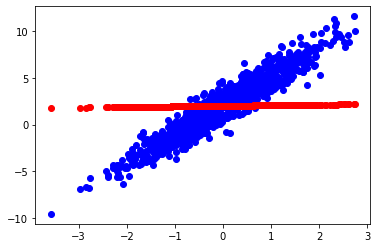

In [83]:
# plot을 통해 학습이 제대로 되었는지 확인한다.
import matplotlib.pyplot as plt

plt.scatter(x, y, c = 'b')

plt.scatter(x, keras_model(x), c = 'r')

In [85]:
# 2차 학습
keras_model.fit(x, y, epochs = 30, batch_size = 1000)

Epoch 1/30
1/1 [==============================] - 0s 1ms/step - loss: 10.3222
Epoch 2/30
1/1 [==============================] - 0s 0s/step - loss: 10.3352
Epoch 3/30
1/1 [==============================] - 0s 0s/step - loss: 10.3246
Epoch 4/30
1/1 [==============================] - 0s 997us/step - loss: 10.3200
Epoch 5/30
1/1 [==============================] - 0s 0s/step - loss: 10.3428
Epoch 6/30
1/1 [==============================] - 0s 0s/step - loss: 10.3200
Epoch 7/30
1/1 [==============================] - 0s 997us/step - loss: 10.3252
Epoch 8/30
1/1 [==============================] - 0s 997us/step - loss: 10.3257
Epoch 9/30
1/1 [==============================] - 0s 0s/step - loss: 10.3402
Epoch 10/30
1/1 [==============================] - 0s 997us/step - loss: 10.3221
Epoch 11/30
1/1 [==============================] - 0s 998us/step - loss: 10.3261
Epoch 12/30
1/1 [==============================] - 0s 586us/step - loss: 10.3281
Epoch 13/30
1/1 [==============================] - 0s 

# MINST

이미지 데이터를 다루는 학습을 위해 제공되는 가장 기초적인 데이터셋

손글씨 이미지, 손글씨를 0-9 사이의 숫자로 분류할 수 있도록 라벨링된 데이터

keras는 `tensorflow.keras.datasets.mnist`을 통해 해당 데이터셋을 제공합니다.

손글씨 이미지를 0-9 사이의 값으로 라벨링하는 모델을 구현해보자.

In [106]:
from tensorflow.keras.datasets import mnist

In [107]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [108]:
# 학습 데이터는 28 * 28 크기의 손글씨 이미지, 총 60000 장이 제공됩니다.
x_train.shape

(60000, 28, 28)

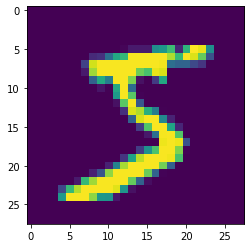

In [110]:
plt.imshow(x_train[0])

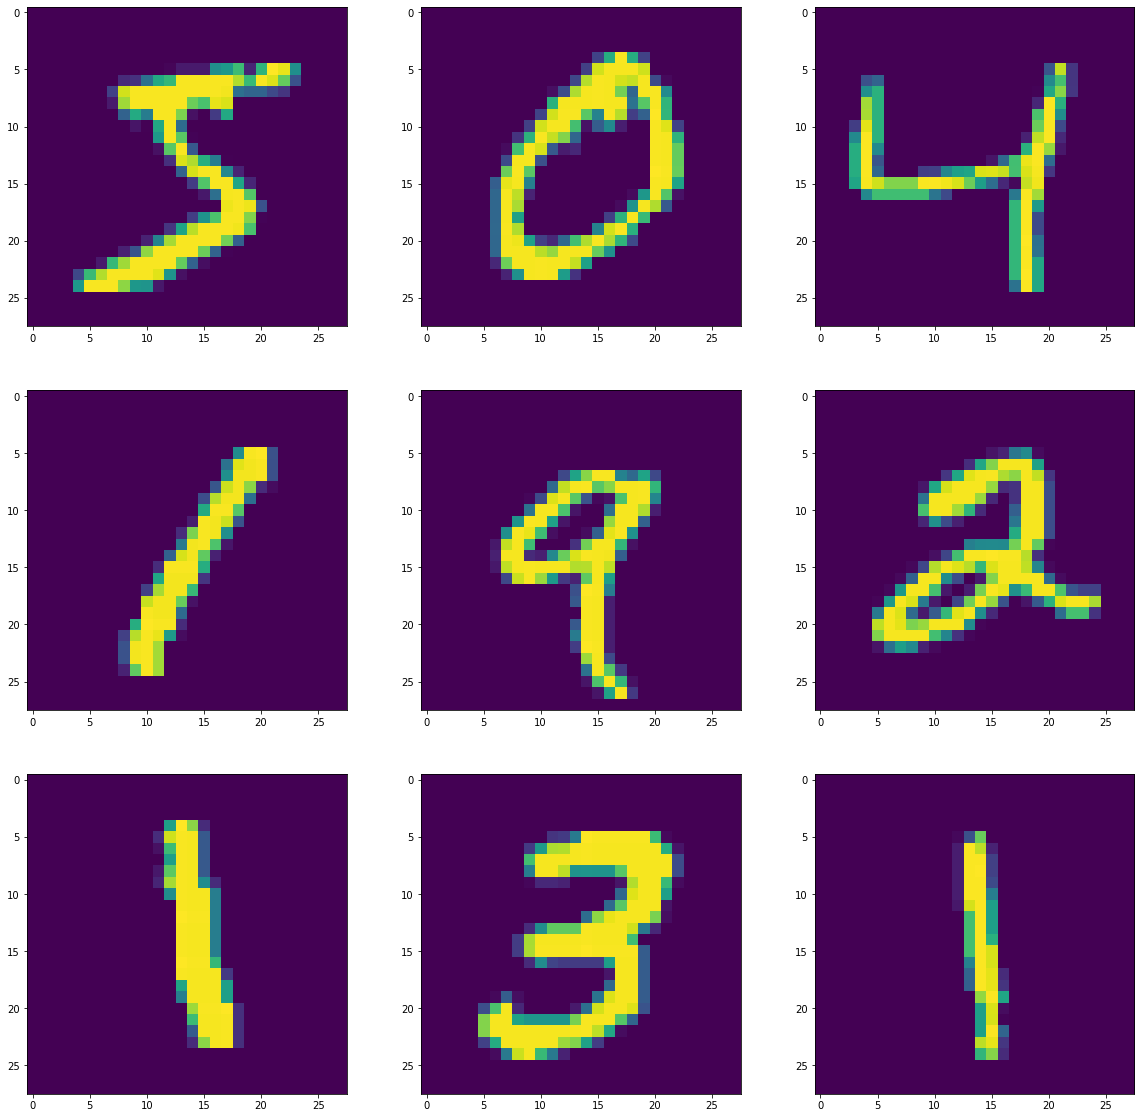

In [112]:
plt.figure(figsize = (20, 20))

# 1 ~ 9번째 까지의 학습 데이터를 이미지로 확인
for i in range(9):
    
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i])
    

## 모델 정의

지금까지 구현하였던 fully connected layer는 입력 텐서는 배열의 형태. 하지만 지금 현재 MNIST가 제공하고 있는 데이터는 28 * 28의 행렬의 형태이다. 행렬의 형태를 배열의 형태로 만들어주기 위해 Flatten이라는 과정이 필요합니다.

<img src="./education_images/fully_connected_layer.png" alt="Drawing" style="width: 600px;"/>

dfjkadsfjasdkfasdkfjkasdkf

In [114]:
# reshape함수를 통해 행렬 형태 -> 배열 형태의 데이터로 변환

# (60000, 28, 28)의 shape -> (60000, 784)
# 0 - 255까지의 값을 가지는 이미지 데이터를 0-1사이의 데이터로 변환하기 위함.
x_train = x_train.reshape(-1, 28 * 28 ).astype('float32') / 255
x_test = x_test.reshape(-1, 28 * 28 ).astype('float32') / 255

In [115]:
# keras를 통해 모델을 구현
from tensorflow.keras import Model

# subclassing 방법으로 모델을 구현
class MyModel(Model):
    
    def __init__(self):
        super().__init__()
        
        # 두개의 fully connected layer
        self.dense1 = tf.keras.layers.Dense(64)
        # 해당 레이어의 결과값은 0-9사이의 숫자를 예측
        self.dense2 = tf.keras.layers.Dense(10)
        
    
    def call(self, X):
        # activation function 
        # 첫번째 레이어 결과
        x = self.dense1(X)
        
        # 두 개의 fully connected layer 사이에 활성화 함수 사용
        x = tf.nn.relu(x)
        
        # 두번째 레이어 결과
        y = self.dense2(x)
        
        return y  

In [149]:
# 모델의 인스턴스 생성

my_model = MyModel()

In [150]:
# compile함수를 통해 모델의 학습루프 정의

my_model.compile(
    # 가장 많이 사용하는 옵티마이저를 사용함
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1),
    
    # 현재 데이터셋이 다중 분류이기 때문에 해당 데이터셋에 맞는 손실함수 정의
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    
    # 학습 과정마다 확인할 변수들 -> 학습 할 때마다 정확도가 어떻게 바뀌는지 
    metrics = ['accuracy']
)

In [151]:
my_model.fit(x_train, y_train, batch_size = 32, epochs = 30, verbose = 2)

Epoch 1/30
1875/1875 - 1s - loss: 1.3167 - accuracy: 0.5687
Epoch 2/30
1875/1875 - 1s - loss: 1.3146 - accuracy: 0.5594
Epoch 3/30
1875/1875 - 1s - loss: 1.3585 - accuracy: 0.5365
Epoch 4/30
1875/1875 - 1s - loss: 1.3402 - accuracy: 0.5446
Epoch 5/30
1875/1875 - 1s - loss: 1.3768 - accuracy: 0.5189
Epoch 6/30
1875/1875 - 1s - loss: 1.3600 - accuracy: 0.5317
Epoch 7/30
1875/1875 - 1s - loss: 1.3941 - accuracy: 0.5247
Epoch 8/30
1875/1875 - 1s - loss: 1.3671 - accuracy: 0.5262
Epoch 9/30
1875/1875 - 1s - loss: 1.3467 - accuracy: 0.5185
Epoch 10/30
1875/1875 - 1s - loss: 1.3391 - accuracy: 0.5321
Epoch 11/30
1875/1875 - 1s - loss: 1.4268 - accuracy: 0.5020
Epoch 12/30
1875/1875 - 1s - loss: 1.3114 - accuracy: 0.5364
Epoch 13/30
1875/1875 - 1s - loss: 1.3496 - accuracy: 0.5288
Epoch 14/30
1875/1875 - 1s - loss: 1.3325 - accuracy: 0.5205
Epoch 15/30
1875/1875 - 1s - loss: 1.3105 - accuracy: 0.5334
Epoch 16/30
1875/1875 - 1s - loss: 1.3431 - accuracy: 0.5154
Epoch 17/30
1875/1875 - 1s - loss

In [124]:
# 모델 평가하기
my_model.evaluate(x_test, y_test, batch_size = 32)

313/313 [==============================] - 0s 379us/step - loss: 1.7595 - accuracy: 0.5893


[1.759541392326355, 0.5892999768257141]

## 2차 학습

In [152]:
my_model.fit(x_train, y_train, batch_size = 32, epochs = 30, verbose = 2)

Epoch 1/30
1875/1875 - 1s - loss: 1.3164 - accuracy: 0.5343
Epoch 2/30
1875/1875 - 1s - loss: 1.2563 - accuracy: 0.5385
Epoch 3/30
1875/1875 - 1s - loss: 1.2744 - accuracy: 0.5398
Epoch 4/30
1875/1875 - 1s - loss: 1.2830 - accuracy: 0.5393
Epoch 5/30
1875/1875 - 1s - loss: 1.2612 - accuracy: 0.5464
Epoch 6/30
1875/1875 - 1s - loss: 1.3677 - accuracy: 0.5367
Epoch 7/30
1875/1875 - 1s - loss: 1.2447 - accuracy: 0.5393
Epoch 8/30
1875/1875 - 1s - loss: 1.2550 - accuracy: 0.5327
Epoch 9/30
1875/1875 - 1s - loss: 1.3089 - accuracy: 0.5387
Epoch 10/30
1875/1875 - 1s - loss: 1.3652 - accuracy: 0.5304
Epoch 11/30
1875/1875 - 1s - loss: 1.3074 - accuracy: 0.5387
Epoch 12/30
1875/1875 - 1s - loss: 1.2542 - accuracy: 0.5411
Epoch 13/30
1875/1875 - 1s - loss: 1.3069 - accuracy: 0.5355
Epoch 14/30
1875/1875 - 1s - loss: 1.2664 - accuracy: 0.5405
Epoch 15/30
1875/1875 - 1s - loss: 1.2612 - accuracy: 0.5477
Epoch 16/30
1875/1875 - 1s - loss: 1.2611 - accuracy: 0.5306
Epoch 17/30
1875/1875 - 1s - loss

### 모델의 정확도가 더이상 올라가지 않는 경우

1. 이미지 데이터의 경우, flatten하는 과정에서 이미지 데이터의 특성인 위치정보가 손실됩니다. 기존에 이미지가 가지고 있는 정보보다 훨씬 적은 정보를 모델에게 제공할 수 밖에 없다.

- 해결 방법 : 위치 정보를 손실 시키지 않도록 Input을 행렬의 형태 그래도 사용, CNN 모델 사용.


2. 데이터가 많은 정보를 제공함에도 불구하고 모델이 충분히 크지 않는 경우, 모델의 레이어 수, 모델 내의 레이어의 파라미터 수등, 모델의 크기가 작은 경우에는 충분히 학습을 수행하였음에도 정확도가 높이지지 않는다.

- 해결 방법 : 모델 내의 레이어를 추가, 레이어가 가진 파라미터 수를 증가, 다른 모델과의 결합

# 모델 저장하기

학습이 진행되고 난 이후 학습된 모델을 저장하기 위한 함수가 `tf.keras.Model` 클래스에 구현되어있다.

In [125]:
# checkpoint 객체를 통해 가중치를 저장하였다.
# 단순히 SAVE 함수를 통해 모델을 저장
my_model.save('./model/keras_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ./model/keras_model\assets


In [128]:
my_model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  50240     
_________________________________________________________________
dense_2 (Dense)              multiple                  650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [126]:
# 모델 불러오기
my_new_model = tf.keras.models.load_model('./model/keras_model')

In [127]:
my_new_model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              multiple                  50240     
_________________________________________________________________
dense_2 (Dense)              multiple                  650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
